分类：手写字识别任务
主要步骤：

+ 读取数据
+ 数据预处理
+ 训练SVC分类器
+ 测试集上性能评估

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

# the digits dataset
digits = datasets.load_digits()

In [6]:
for key, value in digits.items():
    try:
        print (key, value.shape)
    except:
        print (key)

('images', (1797, 8, 8))
('data', (1797, 64))
('target_names', (10,))
DESCR
('target', (1797,))


In [7]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2,4, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Training: %i" % label)

In [13]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
# 引入SVC分类器
classifier = svm.SVC(gamma=0.001)
# 使用前面一般的资料来训练
classifier.fit(data[:n_samples / 2], digits.target[: n_samples / 2])
#测试集实际类标
expected = digits.target[n_samples / 2: ]
#测试集上预测类标
predicted = classifier.predict(data[n_samples / 2:])

In [18]:
print 'expected:',expected[:10],'expected shape:',expected.shape
print 'predicted:',predicted[:10]


expected: [8 8 4 9 0 8 9 8 1 2] expected shape: (899,)
predicted: [8 8 4 9 0 8 9 8 1 2]


上面简单观察了前10个数据的预测类标和实际类标，那么全局的测试集上的预测情况呢？

这里使用混淆矩阵来统计

In [16]:
print ("Confusion matrix: \n%s" % metrics.confusion_matrix(expected, predicted))

Confusion matrix: 
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


测试集有899个，左上角的87 代表： 实际是0且预测为0的总数有87个。同一列的第五元素，表示：实际为0,预测为4的个数是1.

下面我们将这个混淆矩阵可视化出来

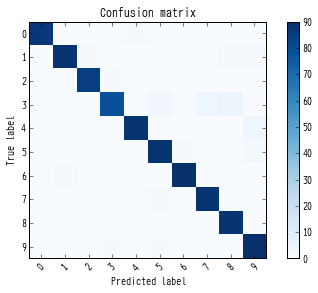

In [21]:
%matplotlib inline
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    import numpy as np
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(digits.target_names))
    plt.xticks(tick_marks, digits.target_names, rotation=45)
    plt.yticks(tick_marks, digits.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plt.figure()
plot_confusion_matrix(metrics.confusion_matrix(expected, predicted))

In [23]:
print("Classification report for classifier %s:\n%s\n"
    % (classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899




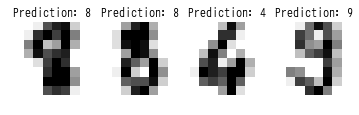

In [24]:
images_and_predictions = list(
                        zip(digits.images[n_samples / 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()